# Pixel Operations

1. Color space conversion: RGB and HSV
1. Negation in RGB and HSV
1. Color rotation
1. Bit planes of gray scale images

In [1]:
import numpy as np
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def imshow(imlist): # image show for cv2 BGR images
    """
    display a list of images
    """ 
    import numpy 
    if type(imlist) == numpy.ndarray or len(imlist) == 1:
        if type(imlist) == numpy.ndarray:
            plt.imshow(imlist); 
        else:
            plt.imshow(imlist[0]); 
        plt.axis(False);
    else:
        fig, axes = plt.subplots(1, len(imlist), figsize=(12,4))
        for ax, im in zip(axes, imlist):
            if len(im.shape) == 2:
                ax.imshow(im, cmap='gray')
            else:
                ax.imshow(im)
            ax.set_axis_off()
    #

# Color space conversion: RGB - HSV

- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

- Bit resolution is important. UInt8 is the default bit format for an image. Do not assume it will be automatically Uint8. Make this specification explicit! 

In [3]:
from skimage import color

(1, 9, 3)

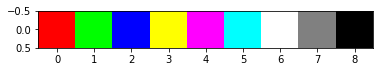

In [4]:
cim255 = np.array([[[255, 0, 0], [0, 255, 0], [0, 0, 255],
                    [255, 255, 0], [255, 0, 255], [0, 255, 255], 
                    [255, 255, 255], [128, 128, 128], [0, 0, 0]]], 
                dtype='uint8')

cnames = ['red', 'green', 'blue', 
          'yellow', 'magenta', 'cyan', 
          'white', 'gray', 'black']

plt.imshow(cim255)
cim255.shape 

In [5]:
# this is opencv version. default output is 255 uint8
cv2.cvtColor(cim255, cv2.COLOR_RGB2HSV)

array([[[  0, 255, 255],
        [ 60, 255, 255],
        [120, 255, 255],
        [ 30, 255, 255],
        [150, 255, 255],
        [ 90, 255, 255],
        [  0,   0, 255],
        [  0,   0, 128],
        [  0,   0,   0]]], dtype=uint8)

In [6]:
# now come back to skimage
hsv = color.rgb2hsv(cim255)
hsv 

array([[[0.        , 1.        , 1.        ],
        [0.33333333, 1.        , 1.        ],
        [0.66666667, 1.        , 1.        ],
        [0.16666667, 1.        , 1.        ],
        [0.83333333, 1.        , 1.        ],
        [0.5       , 1.        , 1.        ],
        [0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.50196078],
        [0.        , 0.        , 0.        ]]])

RGB ->  HSV
red        : [0. 1. 1.]
green      : [0.33 1.   1.  ]
blue       : [0.67 1.   1.  ]
yellow     : [0.17 1.   1.  ]
magenta    : [0.83 1.   1.  ]
cyan       : [0.5 1.  1. ]
white      : [0. 0. 1.]
gray       : [0.  0.  0.5]
black      : [0. 0. 0.]


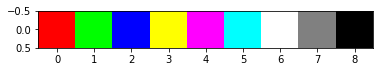

In [7]:
print('RGB ->  HSV')
for i in range(len(cnames)):
    print(f'{cnames[i]:10} : {np.round(hsv[0,i], 2)}')
plt.imshow(cim255);

In [8]:
# HSV -> RGB come back
rgb = color.hsv2rgb(hsv)
rgb, type(rgb), rgb.dtype 

(array([[[1.        , 0.        , 0.        ],
         [0.        , 1.        , 0.        ],
         [0.        , 0.        , 1.        ],
         [1.        , 1.        , 0.        ],
         [1.        , 0.        , 1.        ],
         [0.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.50196078, 0.50196078, 0.50196078],
         [0.        , 0.        , 0.        ]]]),
 numpy.ndarray,
 dtype('float64'))

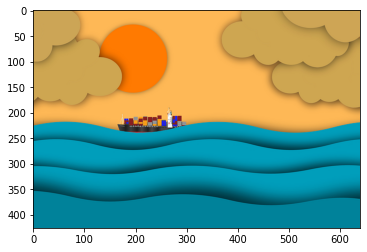

In [9]:
# Now let's use an image
imfile = 'pixels/image-15.png'
im = imageio.imread(imfile)  # RGB
plt.imshow(im);

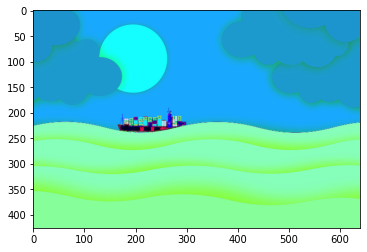

In [10]:
# RGB -> HSV
imhsv = color.rgb2hsv(im)
# display as if it was an RGB
plt.imshow(imhsv);

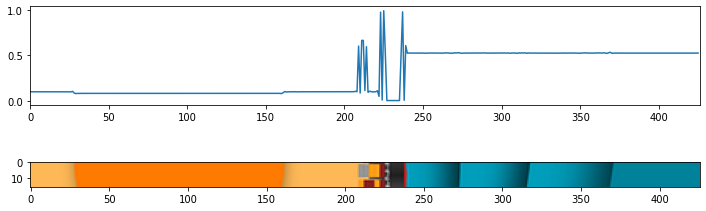

In [11]:
# Hue plot along x = 200
fig, axes = plt.subplots(2,1, figsize=(12,4))
axes[0].plot(imhsv[:,200, 0])
axes[0].set(xlim=[0, imhsv.shape[0]])
im200 = im[:,195:211,:]  # a little bit larger for better visual inspection
axes[1].imshow(im200.transpose(1,0,2));

- Red/yellow colors about 0.1 ~ 0.2 hue values
- Blue region has the same hue despite its variation in brightness

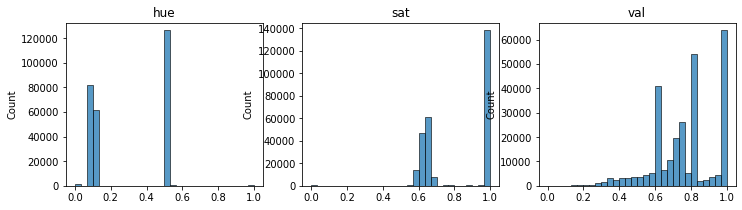

In [12]:
# histogram of HSV channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['hue', 'sat', 'val']):
    sns.histplot(imhsv[:,:,i].reshape(-1), bins=30, ax=axes[i])
    axes[i].set(title=chname)

- saturation about 1.0 means there are many pixels whose color purity is high.

## Tinting Gray-Scale Images

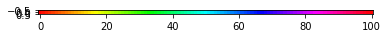

In [13]:
hue_gradient = np.linspace(0, 1, 101)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

plt.imshow(all_hues)

(512, 512) uint8


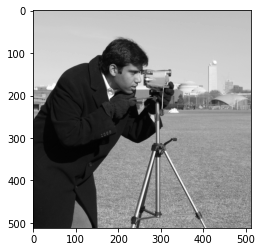

In [14]:
# Tinting Gray-scale Images
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

gray = skimage.data.camera()
print(gray.shape, gray.dtype)
plt.imshow(gray, cmap='gray');

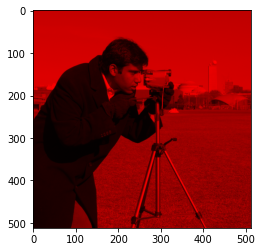

In [15]:
# we use the gray image as value component in HSV
gray1 = gray/255.
hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
hsv[:,:,2] = gray1 
hsv[:,:,0] = 0  # red
hsv[:,:,1] = 1

rgb = color.hsv2rgb(hsv)
plt.imshow(rgb);

In [16]:
# we use the gray image as value component in HSV
def colorize(gray, hue, sat, return_hsv=False):
    # gray: gray scale image of shape (r, c) in uint8 
    # hue, sat : any value in [0, 1] for hue and saturation

    gray1 = gray/255.
    hsv = np.zeros((gray.shape[0], gray.shape[1], 3))
    hsv[:,:,2] = gray1 
    hsv[:,:,0] = hue 
    hsv[:,:,1] = sat

    rgb = color.hsv2rgb(hsv)

    if not return_hsv:
        return rgb 
    else:
        return rgb, hsv 

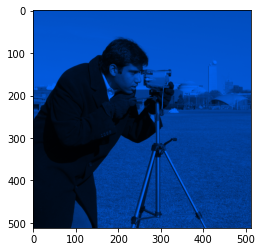

In [17]:
a = colorize(gray, hue=0.6, sat=0.99)
plt.imshow(a);

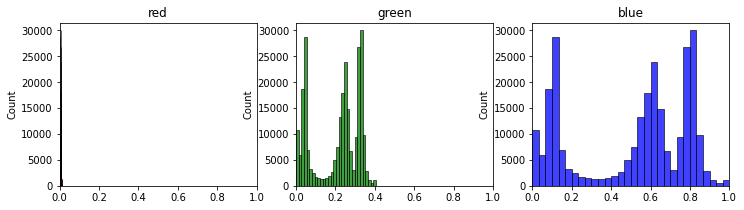

In [18]:
# histogram of HSV channels
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i, chname in enumerate(['red', 'green', 'blue']):
    sns.histplot(a[:,:,i].reshape(-1), bins=30, ax=axes[i], color=chname)
    axes[i].set(title=chname, xlim=[0,1])

<AxesSubplot:ylabel='Count'>

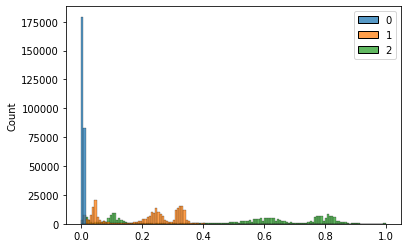

In [19]:
sns.histplot(a.reshape(-1,3))

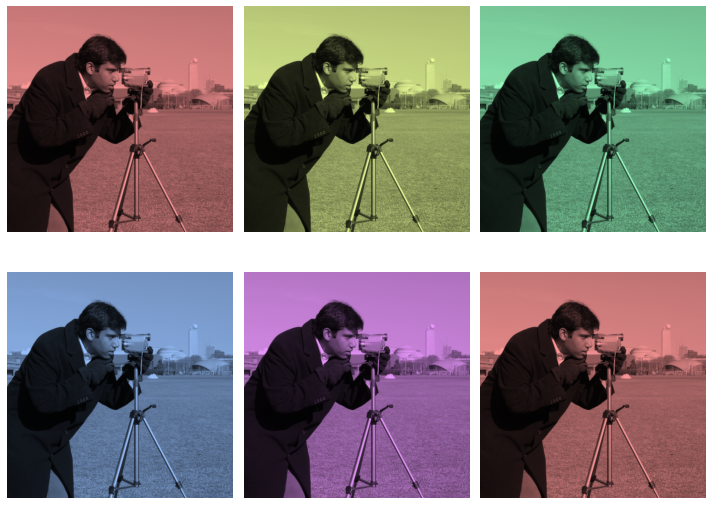

In [20]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True, figsize=(10,8))

hue_values = np.linspace(0, 1, 6)
for ax, hue in zip(axes.flat, hue_values):
    tinted = colorize(gray, hue, sat=0.4)
    ax.imshow(tinted)
    ax.set_axis_off()
fig.tight_layout()

In [21]:
# save to a png file

imageio.imwrite('tinted.png', tinted)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [22]:
tinted = colorize(gray, hue=.3, sat=0.3)

print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = skimage.img_as_ubyte(tinted)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [23]:
tinted = colorize(gray, hue=.3, sat=0.3)
# we know the range of the pixel values is [0, 1]
print('src data type: ', tinted.dtype, tinted.min(), tinted.max())
tinted = (tinted * 255).astype(np.uint8)
print('con data type: ', tinted.dtype, tinted.min(), tinted.max())
imageio.imwrite('tinted.png', tinted)

src data type:  float64 0.0 1.0
con data type:  uint8 0 255


In [24]:
def plotims(ims):
    fig, axes = plt.subplots(1, len(ims), figsize=(12,4))
    for i in range(len(ims)):
        axes[i].imshow(ims[i])
    return

## Color rotation

hsv256: uint8, (512, 512, 3)  0  255


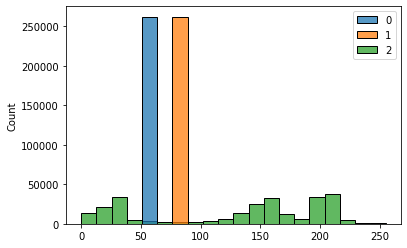

In [25]:
rgb, hsv = colorize(gray, hue=.2, sat=0.35, return_hsv=True)
hsv256 = skimage.img_as_ubyte(hsv) 
print(f'hsv256: {hsv256.dtype}, {hsv256.shape}  {hsv256.min()}  {hsv256.max()}')
sns.histplot(hsv256[:,:,:].reshape(-1, 3), bins=20);

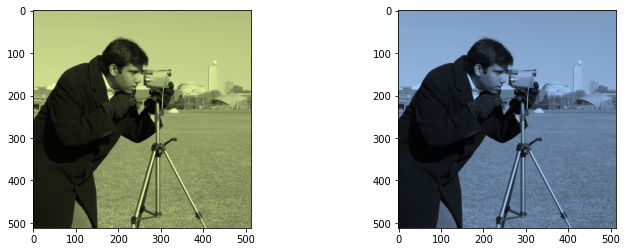

In [26]:
hsv256_2 = hsv256.copy() 
hsv256_2[:,:,0] = (hsv256_2[:,:,0] + 100) % 256  # circulate
plotims([rgb, 
        skimage.img_as_ubyte(color.hsv2rgb(hsv256_2))])

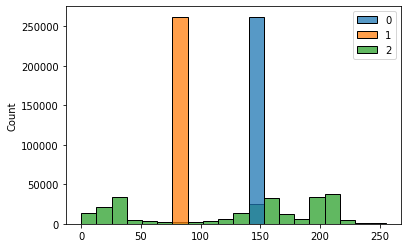

In [27]:
sns.histplot(hsv256_2[:,:,:].reshape(-1, 3), bins=20);

### Color rotation, movie

In [28]:
im = imageio.imread(imfile)  # read in an image file
hsv_src = skimage.img_as_ubyte(color.rgb2hsv(im))  # rgb -> hsv -> hsv256
shifted = hsv_src.copy()                           # destination
step = 1                                           # hue step
for i in range(256000):  # repeat many times
    # shifted[:,200:,0] = (hsv_src[:,200:,0] + i*step) % 256  # change Hue channel
    shifted[:,:,0] = (hsv_src[:,:,0] + i*step) % 256  # change Hue channel, cyclic
    shifted_rgb = color.hsv2rgb(shifted)              # hsv -> rgb, don't forget
    shifted_rgb = shifted_rgb[:,:,::-1]               # RGB -> BGR for cv2 interface
    shifted_rgb = skimage.img_as_ubyte(shifted_rgb)   # BGR 256 uint8 type
    cv2.putText(shifted_rgb,                          # draw a text, PIL also provides this function.
                f'{i*step:3}', 
                org=(20,im.shape[0]), 
                fontFace=cv2.FONT_HERSHEY_PLAIN, 
                fontScale=5, 
                color=(220,220,0), 
                thickness=4)
    cv2.imshow('win', shifted_rgb)       # display image in the window
    if cv2.waitKey(10) == 27: break      # if ESC pressed? then stop
#
cv2.destroyAllWindows()                  # kill the display window

---
## Chroma Key

1. Take a photo with a uniform background color
2. Measure the hue value of the background pixels
3. Replace any pixel having bg hue by the image for bg substitution.

See `chroma_keying.ipynb`

---
# Bitplanes

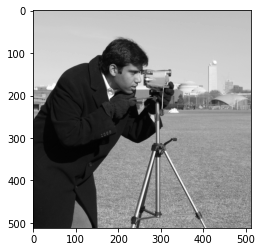

In [29]:
plt.imshow(gray, cmap='gray')

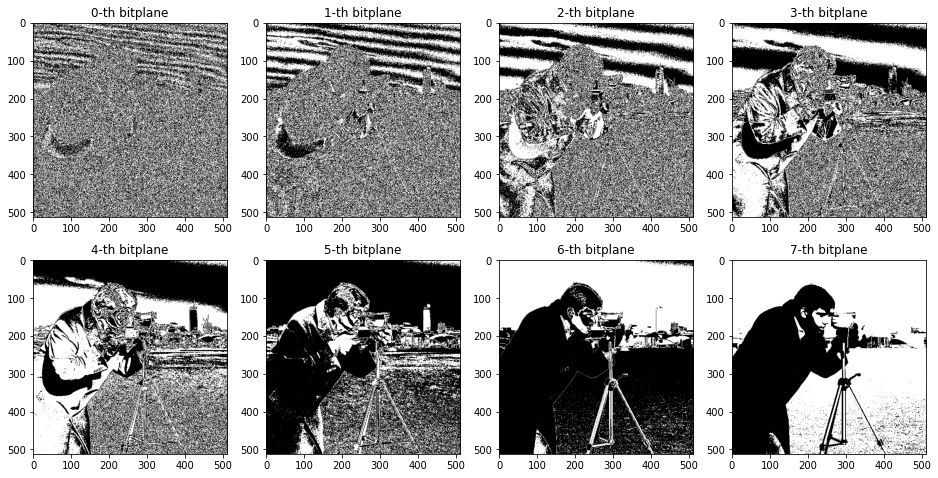

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
b = 1
for i, ax in zip(range(8), axes.flat):
    bitplane = np.bitwise_and(gray, 1<<i)
    ax.imshow(bitplane, cmap='gray')
    ax.set(title=f'{i}-th bitplane')

---
# Gamma Correction
Pixel value change by a mapping transformation; especially for the purpose of monitor display.

In [31]:
import numpy as np
import imageio
import skimage
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

(512, 512) uint8


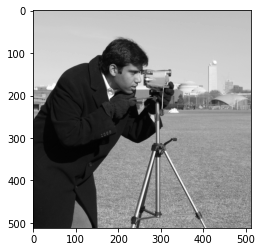

In [32]:
# Tinting Gray-scale Images
# https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py

gray = skimage.data.camera()
print(gray.shape, gray.dtype)
plt.imshow(gray, cmap='gray');

In [33]:
def mapping(input_value, exponent=1.):
    """
    input: pixel value in [0, 1], float
    output: pixel value in [0, 1]
    """
    output_value = np.power(input_value, exponent)
    return output_value

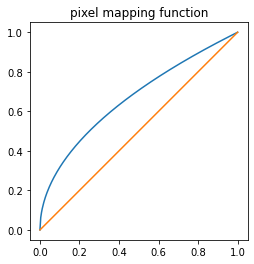

In [34]:
a = np.linspace(0,1,256)
plt.plot(a, mapping(a, 0.5));
plt.plot(a, a);
plt.gca().set_aspect('equal');
plt.title('pixel mapping function');

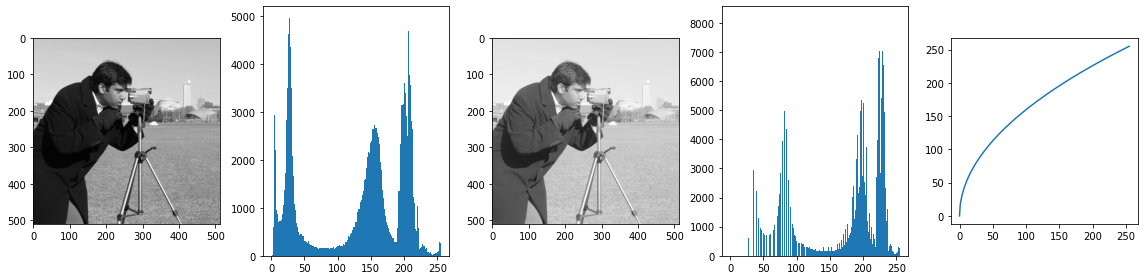

In [35]:
gray2 = mapping(gray / 255., 0.5)
gray2 = (gray2 * 255).astype('uint8')   # convert back to [0, 255] uint8

fig, axes = plt.subplots(1, 5, figsize=(16,4))
axes[0].imshow(gray, cmap='gray');
axes[1].hist(gray.reshape(-1), bins=256);
axes[2].imshow(gray2, cmap='gray');
axes[3].hist(gray2.reshape(-1), bins=256);
axes[4].plot(a*255, 255*mapping(a, .5));
axes[4].set_aspect('equal')
plt.tight_layout()

## General mapping functions

In [36]:
def inverse(im):
    """
    im: an image: RGB/BGR/HSV/Gray
    inverse: pixel_value = 1 - pixel_value
    """
    out = 1 - im 
    return out 

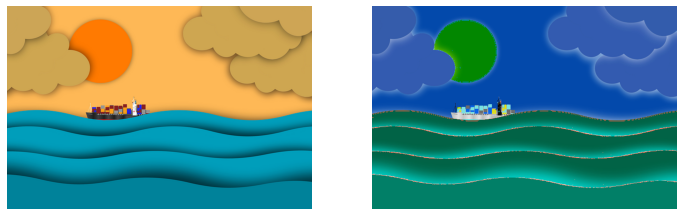

In [37]:
im = imageio.imread("pixels/image-15.png")
im_inverse = inverse(im)
imshow([im, im_inverse]);

(1920, 1920, 3)


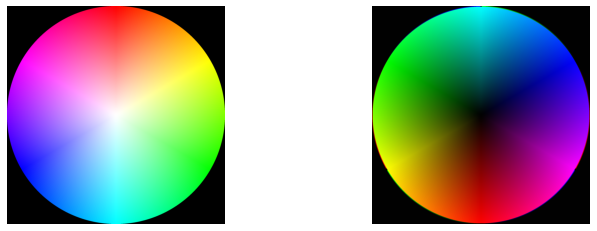

In [38]:
im = cv2.imread("pixels/1920px-Color_circle_(RGB).png")[:,:,::-1]  # RGB
print(im.shape)
im_inverse = inverse(im)
imshow([im, im_inverse]);

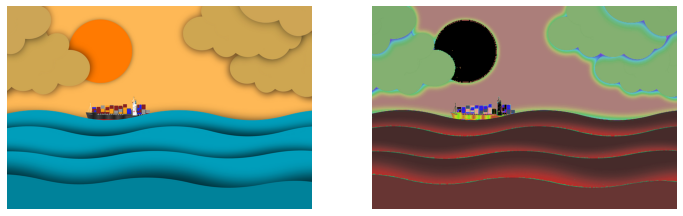

In [39]:
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im_hsv_inverse = inverse(im)
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

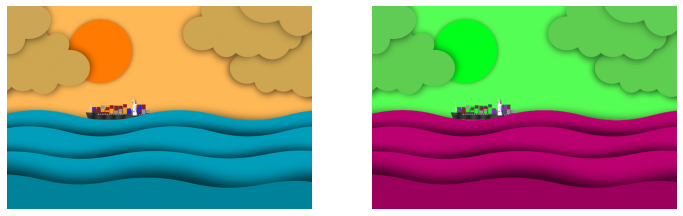

In [40]:
# we may inverse the hue channel only
# (sat, value) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
im_hsv_inverse[:,:,0] = 1 - im_hsv_inverse[:,:,0]
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

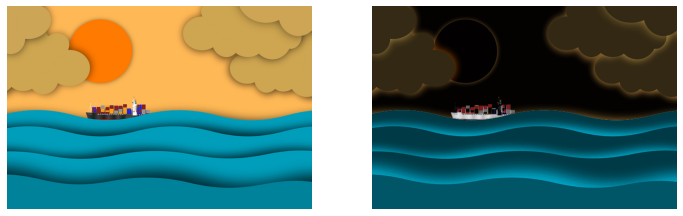

In [41]:
# we may inverse the Value channel only
# (hue, sat) are kept the same
im = cv2.imread("pixels/image-15.png")[:,:,::-1]  # RGB
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
# ---
im_hsv_inverse = im_hsv.copy()
im_hsv_inverse[:,:,2] = 1 - im_hsv_inverse[:,:,2]
# ---
im_inverse = cv2.cvtColor(im_hsv_inverse, cv2.COLOR_HSV2RGB)
imshow([im, im_inverse]);

---
# Brightness Control
- Increase the intensity of the image

(683, 1024, 3)
Intensity Min/Max:  114 208


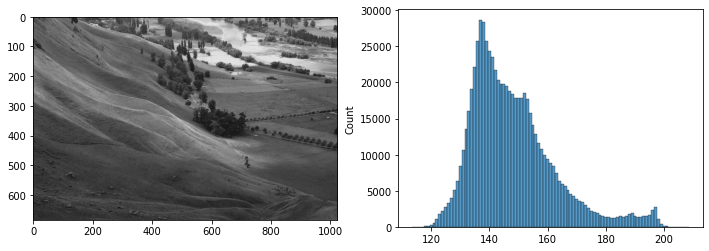

In [42]:
im = cv2.imread("pixels/Unequalized_Hawkes_Bay_NZ.jpg")  # read as single channel 
print(im.shape)

im = im[:,:,0]  # 3 channle but gray scale

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].imshow(im, cmap="gray")
sns.histplot(im.reshape(-1), discrete=True, bins=256)

print("Intensity Min/Max: ", im.min(), im.max())

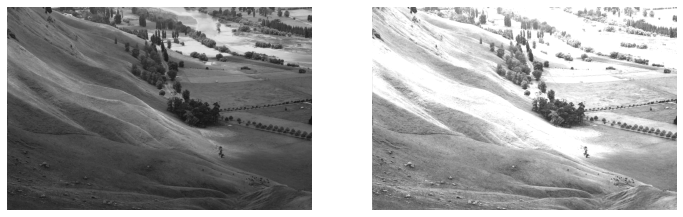

In [43]:
def brightness(im, brightness_adjust = 100):
    im_out = np.empty_like(im)
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            
            result = im[r, c] + brightness_adjust

            if result > 255:
                result = 255
            elif result < 0:
                result = 0 

            im_out[r, c] = result 
    return im_out
#

im_out = brightness(im, 99)
imshow([im, im_out])

<AxesSubplot:ylabel='Count'>

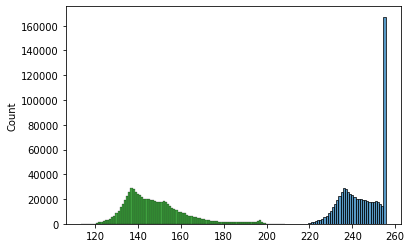

In [44]:
sns.histplot(im_out.reshape(-1), bins=256, discrete=True)
sns.histplot(im.reshape(-1), bins=256, discrete=True, color="green")

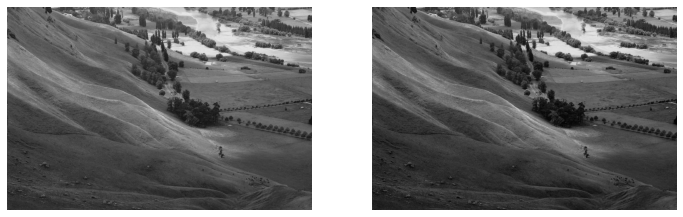

In [45]:
im_out = brightness(im, -120)
imshow([im, im_out])

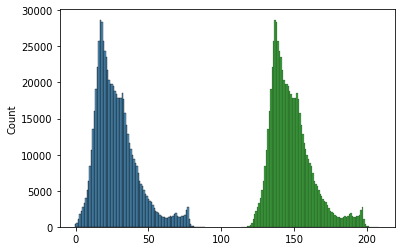

In [46]:
sns.histplot(im_out.reshape(-1), bins=256, discrete=True);
sns.histplot(im.reshape(-1), bins=256, discrete=True, color="green");

### Linear interpolation for full range expansion
- Linear Stretch
$$
    \frac{x-a}{b-a} = \frac{y-c}{d-c}
$$
$$
(x-a) * (d-c) / (b-a) + c = y, \quad d = 255, c= 0, a = I_{min}, b = I_{max}
$$

uint8


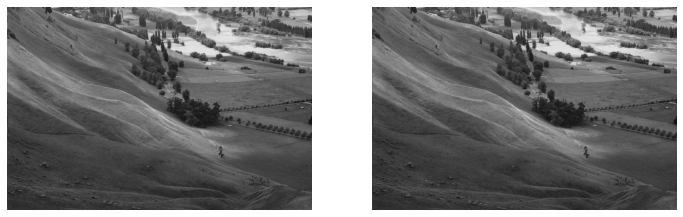

In [47]:
def brightness_expand(im, imin, imax):
    a, b = imin, imax
    def func(x):
        y = (x - a)*(255. - 0) / (imax-imin) + 0.
        return y 

    im_out = np.empty_like(im)
    for r in range(im.shape[0]):
        for c in range(im.shape[1]):
            
            result = func(im[r, c])

            if result > 255:
                result = 255
            elif result < 0:
                result = 0 

            im_out[r, c] = result 
    return im_out
#

im_out = brightness_expand(im, im.min(), im.max())
print(im_out.dtype)
imshow([im, im_out])

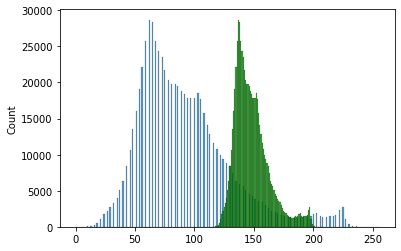

In [48]:
sns.histplot(im_out.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

In [49]:
im.min(), im.max()

(114, 208)

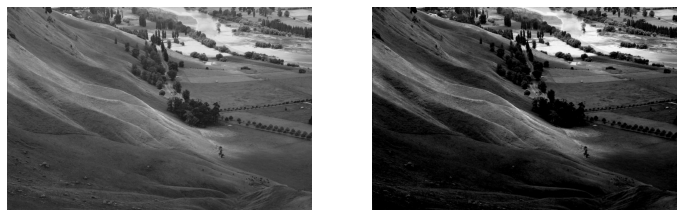

In [53]:
im_out2 = brightness_expand(im, 134, 200)
imshow([im, im_out2])

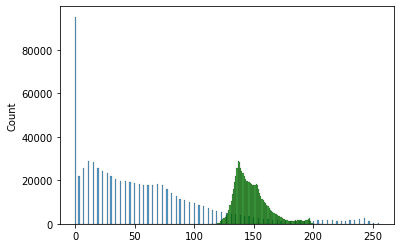

In [54]:
sns.histplot(im_out2.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

In [55]:
# It can be done with numpy
def brightness_expand_np(im, imin, imax):
    im_out = (im - imin) * (255. - 0) / (imax - imin)
    print(im_out.dtype)
    im_out = np.clip(im_out, 0, 255).astype("uint8")
    return im_out
#

float64


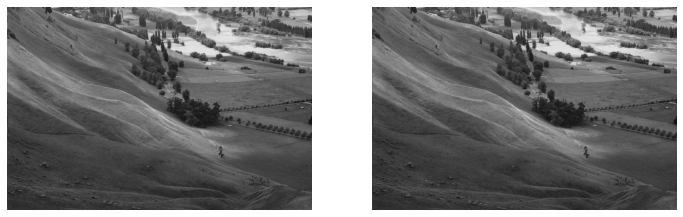

In [57]:
im_out3 = brightness_expand_np(im, im.min(), im.max())
imshow([im, im_out3])

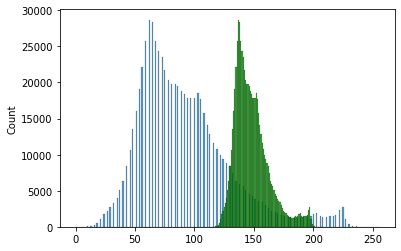

In [58]:
sns.histplot(im_out3.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

float64


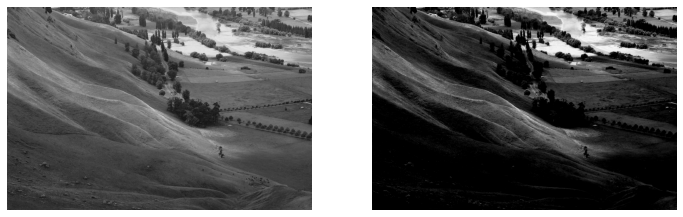

In [61]:
# It can be done with numpy
im_out4 = brightness_expand_np(im, 140., 200.)
imshow([im, im_out4])

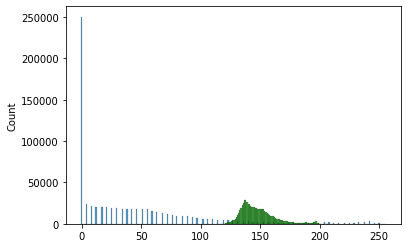

In [62]:
sns.histplot(im_out4.reshape(-1), discrete=True, bins=255);
sns.histplot(im.reshape(-1), discrete=True, color='green', bins=255);

**Linearly Stretching** was the main algorithm above.

---
# Histogram Equalization (Contrast control)
- See [wikipedia for Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)
    - Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.
    - This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values. 
    - Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. This allows for areas of lower local contrast to gain a higher contrast. 
    - Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which use to degrade image contrast.
    - The method is useful in images with backgrounds and foregrounds that are both bright or both dark.
    - Change the pixel values in such a way that the histogram of the pixel values become a uniform distribution.

![image](pixels/hist_eq_example.png)

### OpenCV has the function.

(683, 1024, 3)


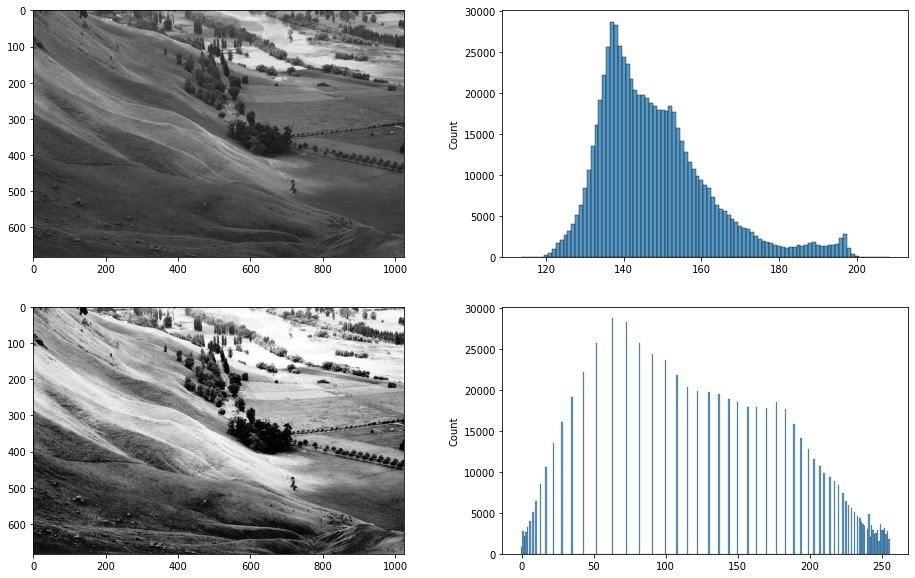

In [92]:
im = cv2.imread("pixels/Unequalized_Hawkes_Bay_NZ.jpg")  # read as single channel 
print(im.shape)
im = im[:,:,0]  # 3 channle but gray scale

im_eq = cv2.equalizeHist(im)

fig, axes = plt.subplots(2,2, figsize=(16,10))
axes[0,0].imshow(im, cmap='gray');       
sns.histplot(im.reshape(-1), discrete=True, ax=axes[0,1])
axes[1,0].imshow(im_eq, cmap='gray')
sns.histplot(im_eq.reshape(-1), discrete=True, ax=axes[1,1]);
# for ax in axes.ravel():
#     ax.set_axis_off()

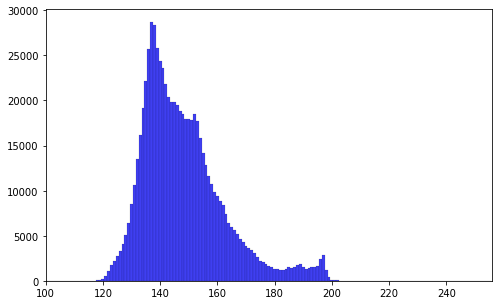

In [123]:
# Histogram DIY
histogram_array = np.zeros((256), dtype="int")

for r in range(im.shape[0]):
    for c in range(im.shape[1]):
        intensity = im[r, c]
        histogram_array[intensity] += 1  # count the number of pixels whose intensity is ...
#

plt.figure(figsize=(8, 5))
plt.bar(range(256), histogram_array, width=1, facecolor='#3f3ff1', linewidth=.1, edgecolor='black')
plt.xlim([100, 256]);

- Histogram corresponds to the distribution of pixel intensities.
- CDF of the normalized histogram plays the role of mapping: input distribution -> uniform distribution
    - CDF: Cumulative Distribution Function

(256,) (257,) (256,) float64 (256,)


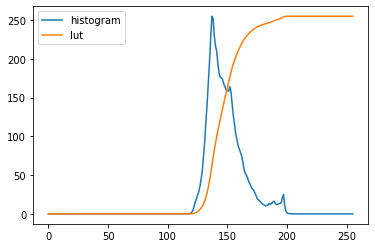

In [67]:
hist_im, hist_im_bins = np.histogram(im.reshape(-1), bins=256, range=(0,256))
cdf = hist_im.cumsum()
lut = cdf * 255. / cdf[-1]
print(hist_im.shape, hist_im_bins.shape, cdf.shape , lut.dtype, lut.shape)

hist_im255 = hist_im * 255 / hist_im.max()  # scaling

plt.plot(range(0, 256), hist_im255, label='histogram')
plt.plot(range(0, 256), lut, label='lut')
plt.legend();

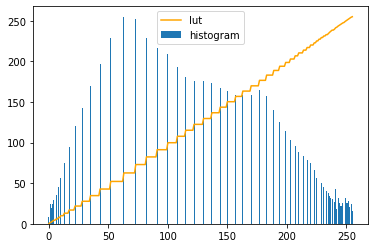

In [70]:
hist_im_eq, hist_im_eq_bins = np.histogram(im_eq.reshape(-1), bins=256, range=(0,256))
cdf_eq = hist_im_eq.cumsum()
lut_eq = cdf_eq * 255. / cdf_eq[-1]

hist_im_eq255 = hist_im_eq * 255 / hist_im_eq.max()  # scaling

plt.bar(range(0, 256), hist_im_eq255, label='histogram')
plt.plot(range(0, 256), lut_eq, label='lut', color='orange')
plt.legend();

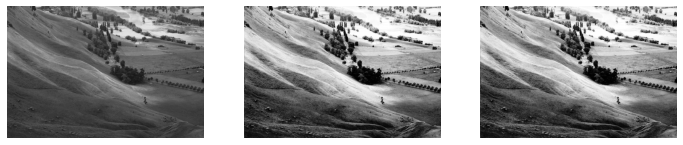

In [76]:
# LUT gives the transformatioin function
# we may apply it directly instead of utilizing cv2.hist_equalize()

im_lut = np.zeros_like(im)
for r in range(im.shape[0]):
    for c in range(im.shape[1]):
        intensity = im[r,c]

        mapped = np.clip(lut[intensity] + 0.5, 0, 255).astype("uint8")

        im_lut[r,c] = mapped
#
imshow([im, im_lut, im_eq])

(256,) int64
Abs(diff) =  0


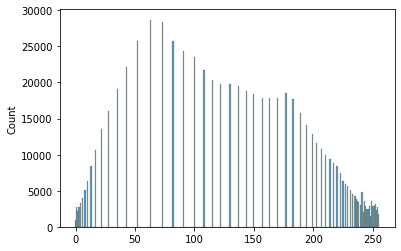

In [90]:
# let's compare the histogram of lut-transformed image and the one from cv2.hist_equalize()
# the two should be almost the same.
#
hist_lut, _ = np.histogram(im_lut.reshape(-1), bins=256, range=(0,256))
print(hist_lut.shape, hist_lut.dtype)

sns.histplot(im_eq.reshape(-1), discrete=True)
plt.bar(np.arange(0, 256), hist_lut, color='orange', alpha=.2);

diff = hist_lut - hist_im_eq
print('Abs(diff) = ', sum(np.abs(diff)))

---
End.